In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
from sklearn import preprocessing

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Shivangi_dic/train.csv")

data

<ipython-input-3-5fd53e4272d8>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Shivangi_dic/train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [4]:
data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [5]:
# missing_counts = data.isnull().sum()
# missing_counts


In [6]:
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 100000
Number of columns: 28


In [7]:
#data.isnull()

In [8]:
data.dropna(subset=['Type_of_Loan' , 'Num_of_Delayed_Payment' , 'Num_Credit_Inquiries'  , 'Amount_invested_monthly' , 'Monthly_Balance' ], inplace=True)


In [9]:
# Clean 'Age' column by removing non-numeric characters and converting to integers
data['Age'] = data['Age'].str.replace('_', '', regex=True)
data['Age'] = data['Age'].astype(int)
data = data[data['Age'] >= 0]



In [10]:
rows_to_remove = data[data['SSN'] == '#F%$D@*&8']


df = data.drop(rows_to_remove.index)


def convert_to_numeric(ssn):
    ssn_without_hyphens = ssn.replace("-", "")
    try:
        return int(ssn_without_hyphens)
    except ValueError:
        return np.nan

# Apply the function to the 'SSN' column
data['SSN'] = data['SSN'].apply(convert_to_numeric)
# Drop rows with NaN values
data.dropna(inplace=True)

# Display the modified DataFrame
print(data)

# Print the updated DataFrame


<ipython-input-10-107f19d20a52>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SSN'] = data['SSN'].apply(convert_to_numeric)


            ID Customer_ID     Month             Name  Age          SSN  \
0       0x1602   CUS_0xd40   January    Aaron Maashoh   23  821000265.0   
6       0x1608   CUS_0xd40      July    Aaron Maashoh   23  821000265.0   
8       0x160e  CUS_0x21b1   January  Rick Rothackerj   28    4075839.0   
9       0x160f  CUS_0x21b1  February  Rick Rothackerj   28    4075839.0   
10      0x1610  CUS_0x21b1     March  Rick Rothackerj   28    4075839.0   
...        ...         ...       ...              ...  ...          ...   
99994  0x25fe8  CUS_0x942c     March            Nicks   25   78735990.0   
99995  0x25fe9  CUS_0x942c     April            Nicks   25   78735990.0   
99996  0x25fea  CUS_0x942c       May            Nicks   25   78735990.0   
99997  0x25feb  CUS_0x942c      June            Nicks   25   78735990.0   
99999  0x25fed  CUS_0x942c    August            Nicks   25   78735990.0   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist  

<ipython-input-10-107f19d20a52>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [11]:
rows_to_remove = data[data['Payment_Behaviour'] == '!@9#%8']

data = data.drop(rows_to_remove.index)

unique_values = data['Payment_Behaviour'].unique()
print(unique_values)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Payment_Behaviour']= label_encoder.fit_transform(data['Payment_Behaviour'])
data['Payment_Behaviour'].unique()


['High_spent_Small_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Large_value_payments' 'Low_spent_Large_value_payments'
 'High_spent_Medium_value_payments' 'Low_spent_Medium_value_payments']


array([2, 5, 0, 3, 1, 4])

In [12]:
## label Encoding for Month data

unique_values = data['Month'].unique()
print(unique_values)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Month']= label_encoder.fit_transform(data['Month'])
data['Month'].unique()


['January' 'July' 'February' 'March' 'May' 'June' 'August' 'April']


array([3, 4, 2, 6, 7, 5, 1, 0])

In [13]:

# Remove rows where 'occupation' is '------' using drop
data1 = data.drop(data[data['Occupation'] == '_______'].index)
data=data1
unique_values = data['Occupation'].unique()
print(unique_values)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Occupation']= label_encoder.fit_transform(data['Occupation'])

data['Occupation'].unique()

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Lawyer' 'Media_Manager'
 'Doctor' 'Journalist' 'Manager' 'Mechanic' 'Writer' 'Accountant'
 'Architect' 'Musician' 'Developer']


array([12, 13,  4,  5,  7, 10,  3,  6,  8,  9, 14,  0,  1, 11,  2])

In [14]:
# Label encoding 'Type_of_Loan'
data = data.drop(data[data['Type_of_Loan'] == ' '].index)

unique_values = data['Type_of_Loan'].unique()
print(unique_values)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Type_of_Loan']= label_encoder.fit_transform(data['Type_of_Loan'])

data['Type_of_Loan'].unique()

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']


array([ 128,  682,   63, ..., 2098, 4813, 4895])

In [15]:
### processing the no_of_loan columns change it to int
data = data[data['Num_of_Loan'].str.match(r'^\d+$')]
data['Num_of_Loan'] = data['Num_of_Loan'].astype(int)
data = data[data['Num_of_Loan'] >= 0]

<ipython-input-15-49f100ec99f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Num_of_Loan'] = data['Num_of_Loan'].astype(int)


In [16]:
### processing the Changed_Credit_Limit change it to int
data = data[~data['Changed_Credit_Limit'].str.contains('_')]
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)
data = data[data['Changed_Credit_Limit'] >= 0]


<ipython-input-16-3795a41f479d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)


In [17]:
## Processing the outstanding Debt

data['Outstanding_Debt'] = data['Outstanding_Debt'].str.replace('[^\d.]', '', regex=True)
data['Outstanding_Debt'] = data['Outstanding_Debt'].astype(float)
data = data[data['Outstanding_Debt'] >= 0]

In [18]:
### Credit_History_Age
unique_values = data['Credit_History_Age'].unique()
label_encoder = preprocessing.LabelEncoder()
data['Credit_History_Age']= label_encoder.fit_transform(data['Credit_History_Age'])
data['Credit_History_Age'].unique()

array([180, 188, 237, 238, 230, 239, 243, 123, 125, 112, 113, 114, 296,
       297, 298, 290, 303,  81,  87, 177, 170, 236, 136, 138, 140, 222,
       223, 224, 226, 217, 229, 240, 244, 245, 246, 392, 396, 397, 127,
       129,  97,  98, 107, 108, 111, 363, 364, 365, 366, 358, 368, 124,
        27,  28,  29,  32,  33,  56,  57, 109,  69,  72, 137, 139, 141,
       289, 391, 382, 126, 128, 130, 131, 135,  63,  68, 175, 169, 225,
        66,  67,  70, 242, 258, 370, 371, 380, 384, 208,  18,  19,  20,
        41,  42, 299,  31,  76,  77,  78, 167, 172,  10, 309, 310, 302,
       312,  54,  58,  49,  50,  43, 214, 206, 219, 220,  24, 132, 304,
       306, 300,  64, 348, 349, 351, 352, 354, 146, 276, 280, 282, 283,
       211, 212, 102, 105, 196, 197, 198, 387, 305, 340, 343, 321, 322,
       323, 325, 326,  51,  52, 116, 117,  59, 274, 266, 287, 291, 218,
       227, 228, 231, 313, 314, 327, 232, 110, 119, 376, 377, 379,  40,
       256, 257, 259, 261, 253, 267, 268, 269, 271, 273,  61,  1

In [19]:
data['Annual_Income'] = data['Annual_Income'].str.replace('[^\d.]', '', regex=True)
data['Annual_Income'] = data['Annual_Income'].replace(['NaN', 'inf'], np.nan)
data['Annual_Income'] = data['Annual_Income'].astype(float)
data['Annual_Income'].fillna(0, inplace=True)
data['Annual_Income']= data['Annual_Income'].astype(float)

In [20]:
# Label encoding 'Payment_of_Min_Amount'
data = data.drop(data[data['Payment_of_Min_Amount'] == 'NM'].index)
unique_values = data['Payment_of_Min_Amount'].unique()
print(unique_values)
label_encoder = preprocessing.LabelEncoder()
data['Payment_of_Min_Amount']= label_encoder.fit_transform(data['Payment_of_Min_Amount'])
data['Payment_of_Min_Amount'].unique()

['No' 'Yes']


array([0, 1])

In [21]:
## Amount_invested_monthly
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].str.replace('[^\d.]', '', regex=True)
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].astype(float)
data = data[data['Amount_invested_monthly'] >= 0]


In [22]:

##Monthly_Balance
# Replace invalid values with NaN in 'Monthly_Balance'
data['Monthly_Balance'] = pd.to_numeric(data['Monthly_Balance'], errors='coerce')
data = data.dropna(subset=['Monthly_Balance'])





['Good' 'Standard' 'Poor']


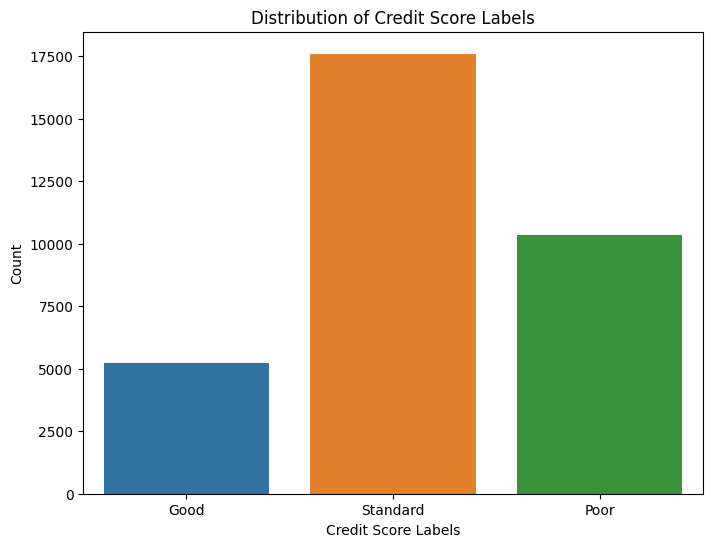

In [23]:
##Credit_Score

unique_values = data['Credit_Score'].unique()
print(unique_values)
# label_encoder = preprocessing.LabelEncoder()
# data['Credit_Score']= label_encoder.fit_transform(data['Credit_Score'])
# data['Credit_Score'].unique()
# data['Credit_Score']

# Create a countplot to visualize the distribution of 'Credit_Score' labels
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Credit_Score')
plt.xlabel('Credit Score Labels')
plt.ylabel('Count')
plt.title('Distribution of Credit Score Labels')
plt.show()

In [24]:
# get customer id for nan values in Name Column
Customer_IDs = data[data['Name'].isnull()]['Customer_ID'].values


In [25]:


# Group by 'Customer_ID' and fill missing 'Name' values with the corresponding realName
data['Name'] = data.groupby('Customer_ID')['Name'].transform(lambda x: x.fillna(method='ffill'))



In [26]:
data.dtypes

ID                           object
Customer_ID                  object
Month                         int64
Name                         object
Age                           int64
SSN                         float64
Occupation                    int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                  int64
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
Credit_Score                

In [27]:
data['Name'].isnull()



0        False
6        False
9        False
10       False
12       False
         ...  
99991    False
99994    False
99995    False
99996    False
99997    False
Name: Name, Length: 33196, dtype: bool

In [28]:
missing_counts = data.isnull().sum()
missing_counts

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [29]:
# Fill missing Monthly_Inhand_Salary values based on Customer_ID using transform
data['Monthly_Inhand_Salary'] = data['Monthly_Inhand_Salary'].fillna(
    data.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform('first')
)


In [30]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# selected_columns = data.select_dtypes(include=['number'])
# # selected_columns = data.select_dtypes(include=['number'])


# correlation_matrix = selected_columns.corr()


# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Heatmap of Factors vs. Monthly Balance')
# plt.show()

In [31]:
## label encoding for Customer ID

unique_values = data['Customer_ID'].unique()
print(unique_values)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Customer_ID']= label_encoder.fit_transform(data['Customer_ID'])
data['Customer_ID'].unique()

['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']


array([10665,   910,  1628, ...,  9235,  6778,  7639])

In [32]:
### Label Encoding for ID
unique_values = data['ID'].unique()
print(unique_values)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['ID']= label_encoder.fit_transform(data['ID'])
data['ID'].unique()

data.dtypes

['0x1602' '0x1608' '0x160f' ... '0x25fe9' '0x25fea' '0x25feb']


ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                           int64
SSN                         float64
Occupation                    int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                  int64
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
Credit_Score                

In [33]:
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [34]:


columns_to_drop = ['Num_of_Delayed_Payment', 'Credit_Mix' ]
data = data.drop(columns=columns_to_drop)
print(data)

data.columns

          ID  Customer_ID  Month             Name  Age          SSN  \
0       5482        10665      3    Aaron Maashoh   23  821000265.0   
6       5514        10665      4    Aaron Maashoh   23  821000265.0   
9       5540          910      2  Rick Rothackerj   28    4075839.0   
10      5544          910      6  Rick Rothackerj   28    4075839.0   
12      5555          910      7  Rick Rothackerj   28    4075839.0   
...      ...          ...    ...              ...  ...          ...   
99991  20841         6778      1   Sarah McBridec   29   31350942.0   
99994  20842         7639      6            Nicks   25   78735990.0   
99995  20843         7639      0            Nicks   25   78735990.0   
99996  20844         7639      7            Nicks   25   78735990.0   
99997  20845         7639      5            Nicks   25   78735990.0   

       Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0              12       19114.12            1824.843333              

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [35]:
data['Monthly_Inhand_Salary']

0        1824.843333
6        1824.843333
9        3037.986667
10       3037.986667
12       3037.986667
            ...     
99991    1929.906667
99994    3359.415833
99995    3359.415833
99996    3359.415833
99997    3359.415833
Name: Monthly_Inhand_Salary, Length: 33196, dtype: float64

In [36]:
## Data Analysis

data['Age']

0        23
6        23
9        28
10       28
12       28
         ..
99991    29
99994    25
99995    25
99996    25
99997    25
Name: Age, Length: 33196, dtype: int64

In [37]:

data[data['Age'] < 20]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
291,7117,2661,0,ra Alperx,16,995378920.0,9,29469.98,2227.831667,7,...,11.0,3421.66,33.298654,66,1,69.685459,27.250795,1,375.846913,Poor
292,7123,2661,7,ra Alperx,16,995378920.0,9,29469.98,2227.831667,7,...,11.0,3421.66,38.177311,67,1,69.685459,71.264386,4,361.833322,Poor
295,7132,2661,1,ra Alperx,16,995378920.0,9,29469.98,2227.831667,7,...,11.0,3421.66,32.962950,70,1,69.685459,24.066131,1,379.031577,Poor
296,7156,5550,3,Matt Falloonz,19,431584893.0,4,72559.36,6284.613333,4,...,1.0,1173.70,23.282135,242,0,215.839171,565.743385,3,116.878777,Standard
312,7242,4055,3,Emily Flitterl,18,397289675.0,2,66567.32,5800.276667,5,...,1618.0,233.79,34.456272,208,0,37602.000000,251.647422,5,518.190884,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99303,20623,5309,1,Aruna Viswanathat,18,897326460.0,0,9409.45,952.120833,5,...,7.0,209.02,40.709515,385,1,37.524075,33.744336,3,293.943673,Standard
99392,20655,2594,3,Gardnerh,18,570964897.0,9,8409.98,553.831667,3,...,6.0,910.12,29.990635,382,1,13.641402,10.461598,0,271.280167,Standard
99395,20656,2594,0,Gardnerh,18,570964897.0,9,8409.98,553.831667,3,...,8.0,910.12,31.771400,393,1,13.641402,37.862981,3,273.878783,Poor
99507,20685,3643,0,Emilyf,17,569849250.0,0,72572.46,6233.705000,4,...,8.0,1321.46,34.802351,156,1,176.374432,295.970436,4,431.025633,Standard


In [38]:
data['Age'].describe()

count    33196.000000
mean       117.952765
std        696.609373
min         14.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8678.000000
Name: Age, dtype: float64

In [39]:
data['Interest_Rate'].describe()

count    33196.000000
mean        77.652247
std        487.716576
min          1.000000
25%          8.000000
50%         15.000000
75%         22.000000
max       5797.000000
Name: Interest_Rate, dtype: float64

In [40]:
data['Annual_Income'] = pd.to_numeric(data['Annual_Income'], errors='coerce')

data['Annual_Income'].describe()

count    3.319600e+04
mean     1.732461e+05
std      1.427159e+06
min      7.005930e+03
25%      1.874380e+04
50%      3.591490e+04
75%      6.974096e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [41]:
data['Num_Credit_Card'].describe()

count    33196.000000
mean        22.976413
std        130.020167
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max       1499.000000
Name: Num_Credit_Card, dtype: float64

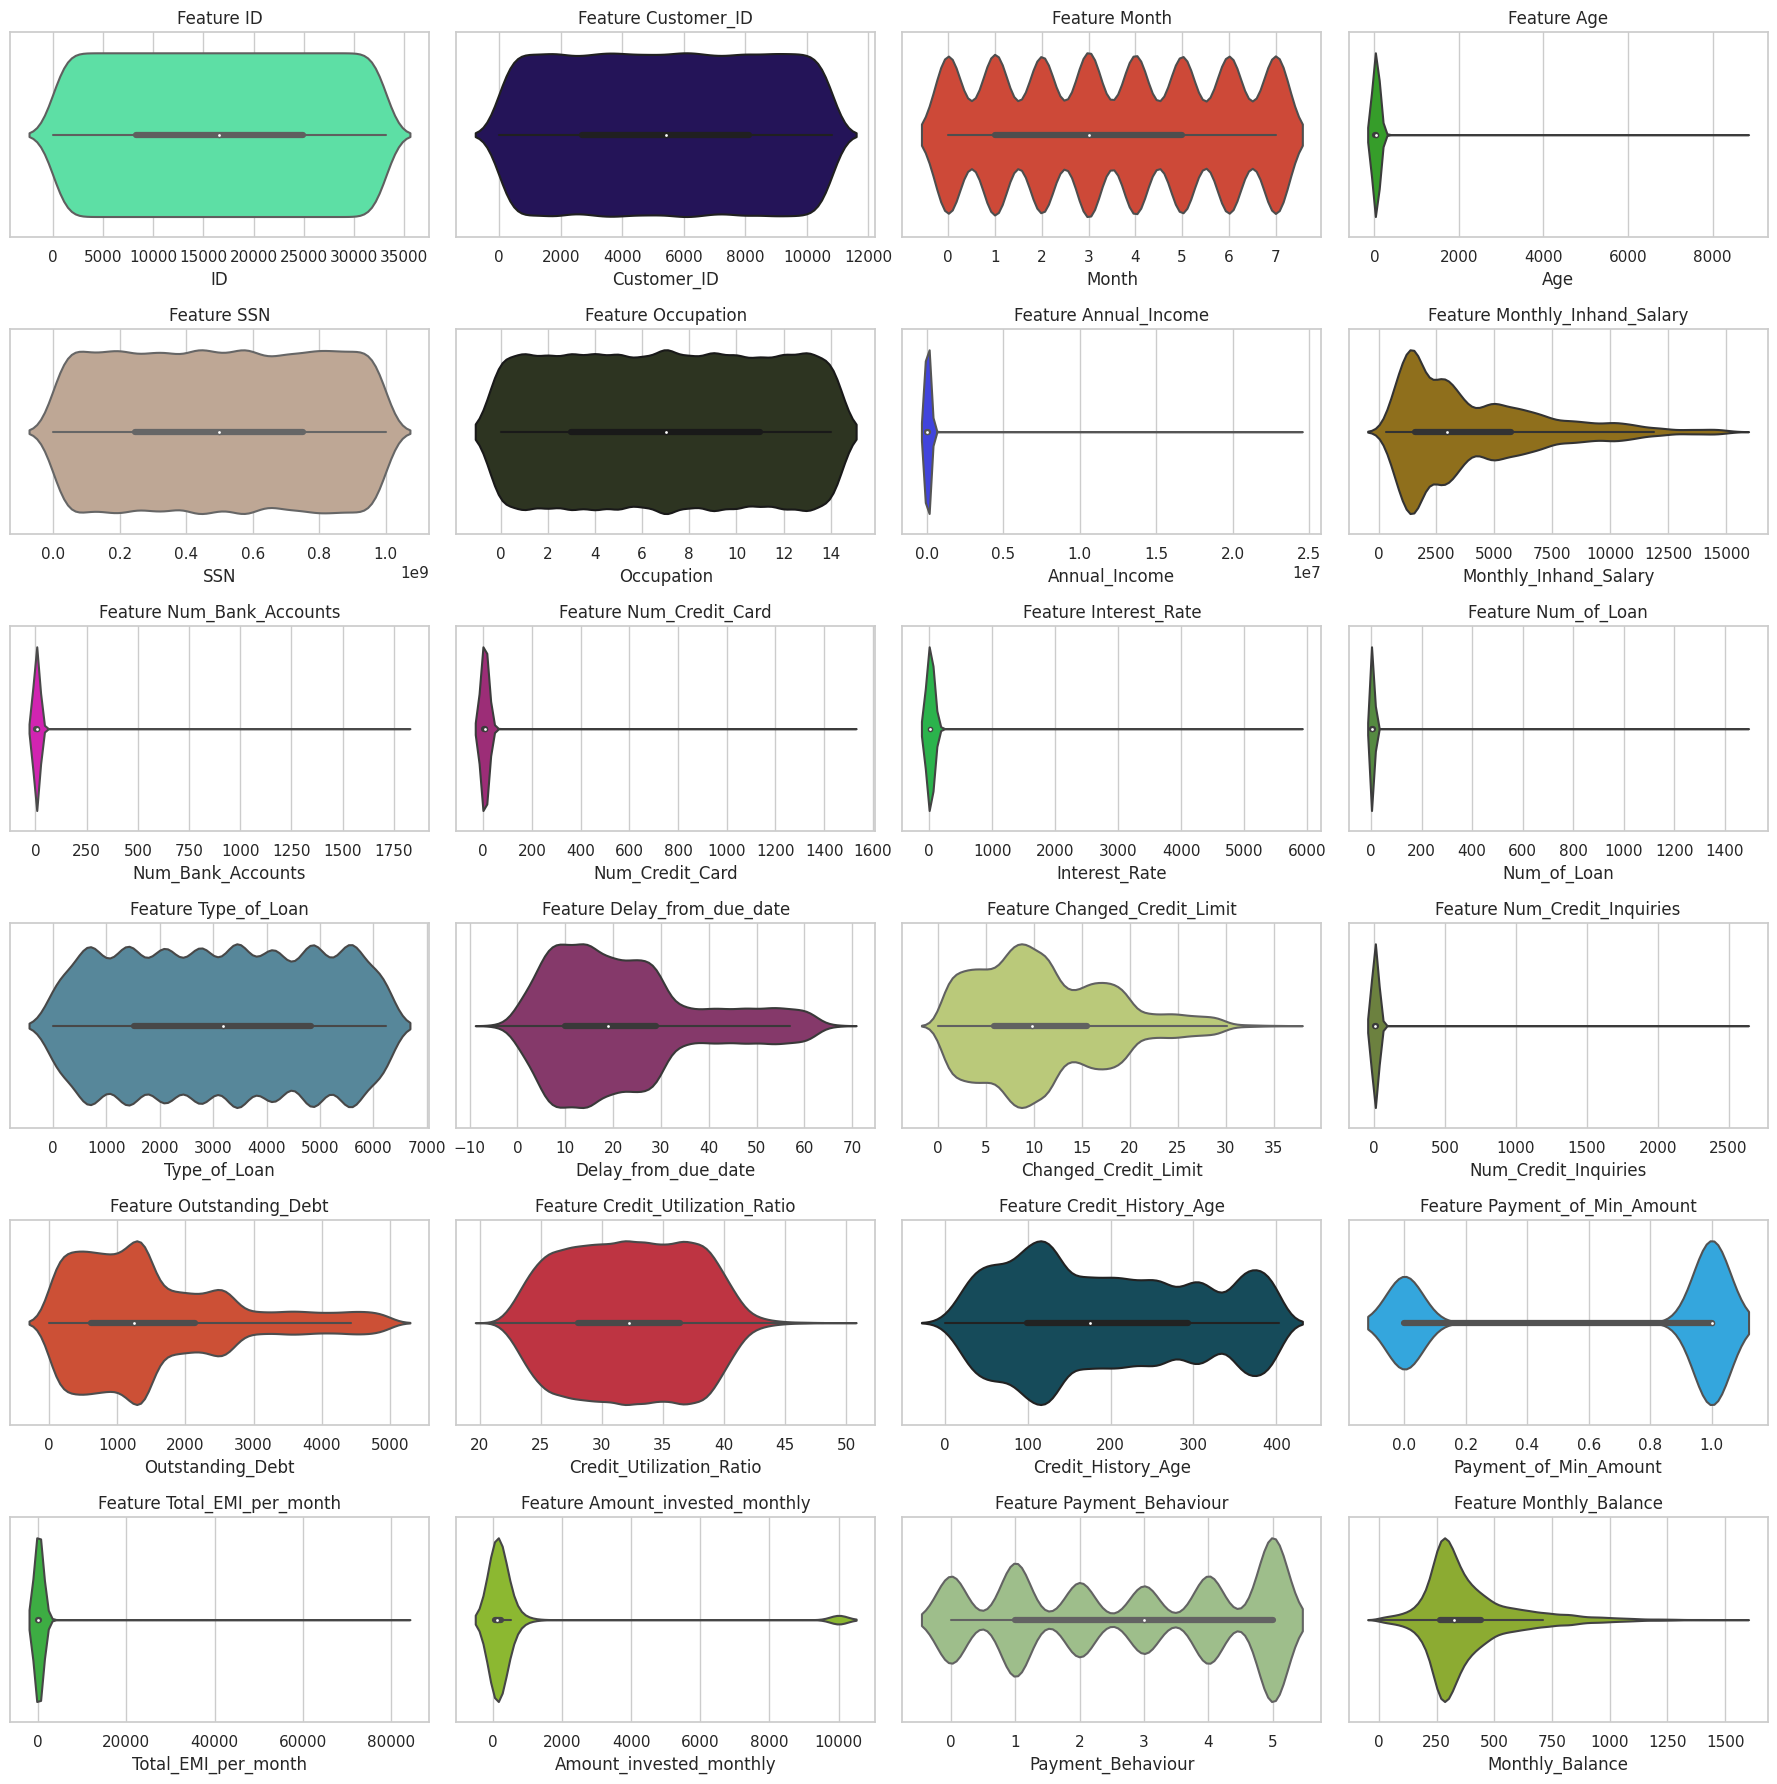

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

num_vars = data.select_dtypes(include=['number'])
sns.set(style='whitegrid')

# Calculate the number of rows and columns for subplots
num_rows = (num_vars.shape[1] - 1) // 4 + 1  # 4 columns per row
num_cols = min(num_vars.shape[1], 4)  # Maximum of 4 columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18), sharey=True)
axes = axes.flatten()

for i, feature in enumerate(num_vars.columns):
    sns.violinplot(x=data[feature], ax=axes[i], color=np.random.rand(3,))
    axes[i].set_title(f'Feature {feature}')

# Remove any extra empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Scaling the data

In [43]:
from sklearn.preprocessing import StandardScaler

numerical_columns = data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
data[numerical_columns.columns] = scaler.fit_transform(numerical_columns)
data


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-1.159936,1.681322,-0.215243,Aaron Maashoh,-0.136309,1.111146,1.164080,-0.108001,-0.706791,-0.121612,...,-0.122913,-0.590486,-1.067960,-0.119605,-1.330684,-0.165405,-0.264166,-0.408299,-0.353960,Good
6,-1.156596,1.681322,0.222281,Aaron Maashoh,-0.136309,1.111146,1.164080,-0.108001,-0.706791,-0.121612,...,-0.122913,-0.590486,-1.915380,-0.049404,-1.330684,-0.165405,-0.215784,1.218625,-0.702351,Good
9,-1.153883,-1.437372,-0.652767,Rick Rothackerj,-0.129131,-1.707439,1.396204,-0.096976,-0.315155,-0.129917,...,-0.133621,-0.762592,1.251452,0.380576,-1.330684,-0.169138,-0.283941,-1.492915,0.528687,Good
10,-1.153466,-1.437372,1.097330,Rick Rothackerj,-0.129131,-1.707439,1.396204,-0.096976,-0.315155,-0.129917,...,-0.133621,-0.762592,0.198185,0.389351,-1.330684,-0.169138,-0.274986,-1.492915,0.435730,Standard
12,-1.152318,-1.437372,1.534854,Rick Rothackerj,-0.129131,-1.707439,1.396204,-0.096976,-0.315155,-0.129917,...,-0.133621,-0.762592,0.544853,0.319151,-1.330684,-0.169138,-0.239612,1.218625,0.324951,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,0.442822,0.438640,-1.090292,Sarah McBridec,-0.127696,-1.613333,-1.389281,-0.107378,-0.672874,-0.063483,...,-0.096143,1.728661,0.972593,1.468689,0.751493,-0.164023,-0.286771,-1.492915,-0.226413,Standard
99994,0.442926,0.713903,1.097330,Nicks,-0.133438,-1.449843,0.467709,-0.093626,-0.211389,-0.113308,...,-0.128267,-0.848792,1.404267,0.986058,-1.330684,-0.167161,-0.234441,-0.950607,0.147440,Poor
99995,0.443031,0.713903,-1.527816,Nicks,-0.133438,-1.449843,0.467709,-0.093626,-0.211389,-0.113308,...,-0.128267,-0.848792,0.482691,0.994834,-1.330684,-0.167161,-0.273773,-1.492915,0.504454,Poor
99996,0.443135,0.713903,1.534854,Nicks,-0.133438,-1.449843,0.467709,-0.093626,-0.211389,-0.113308,...,-0.128267,-0.848792,1.649901,1.003609,-1.330684,-0.167161,-0.277125,-0.950607,0.590542,Poor


In [44]:
# fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20,20))
# index = 0
# ax = ax.flatten()
# for colum,value in data.items():
#   try:
#     sns.boxplot(y=colum, data=df, ax=ax[index])
#     index += 1
#   except:
#     pass

# plt.tight_layout(pad=5, w_pad=5, h_pad=5)

In [45]:
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.ticker as mtick
import plotly.graph_objects as go
import random
import math


In [46]:
df2=data.copy()

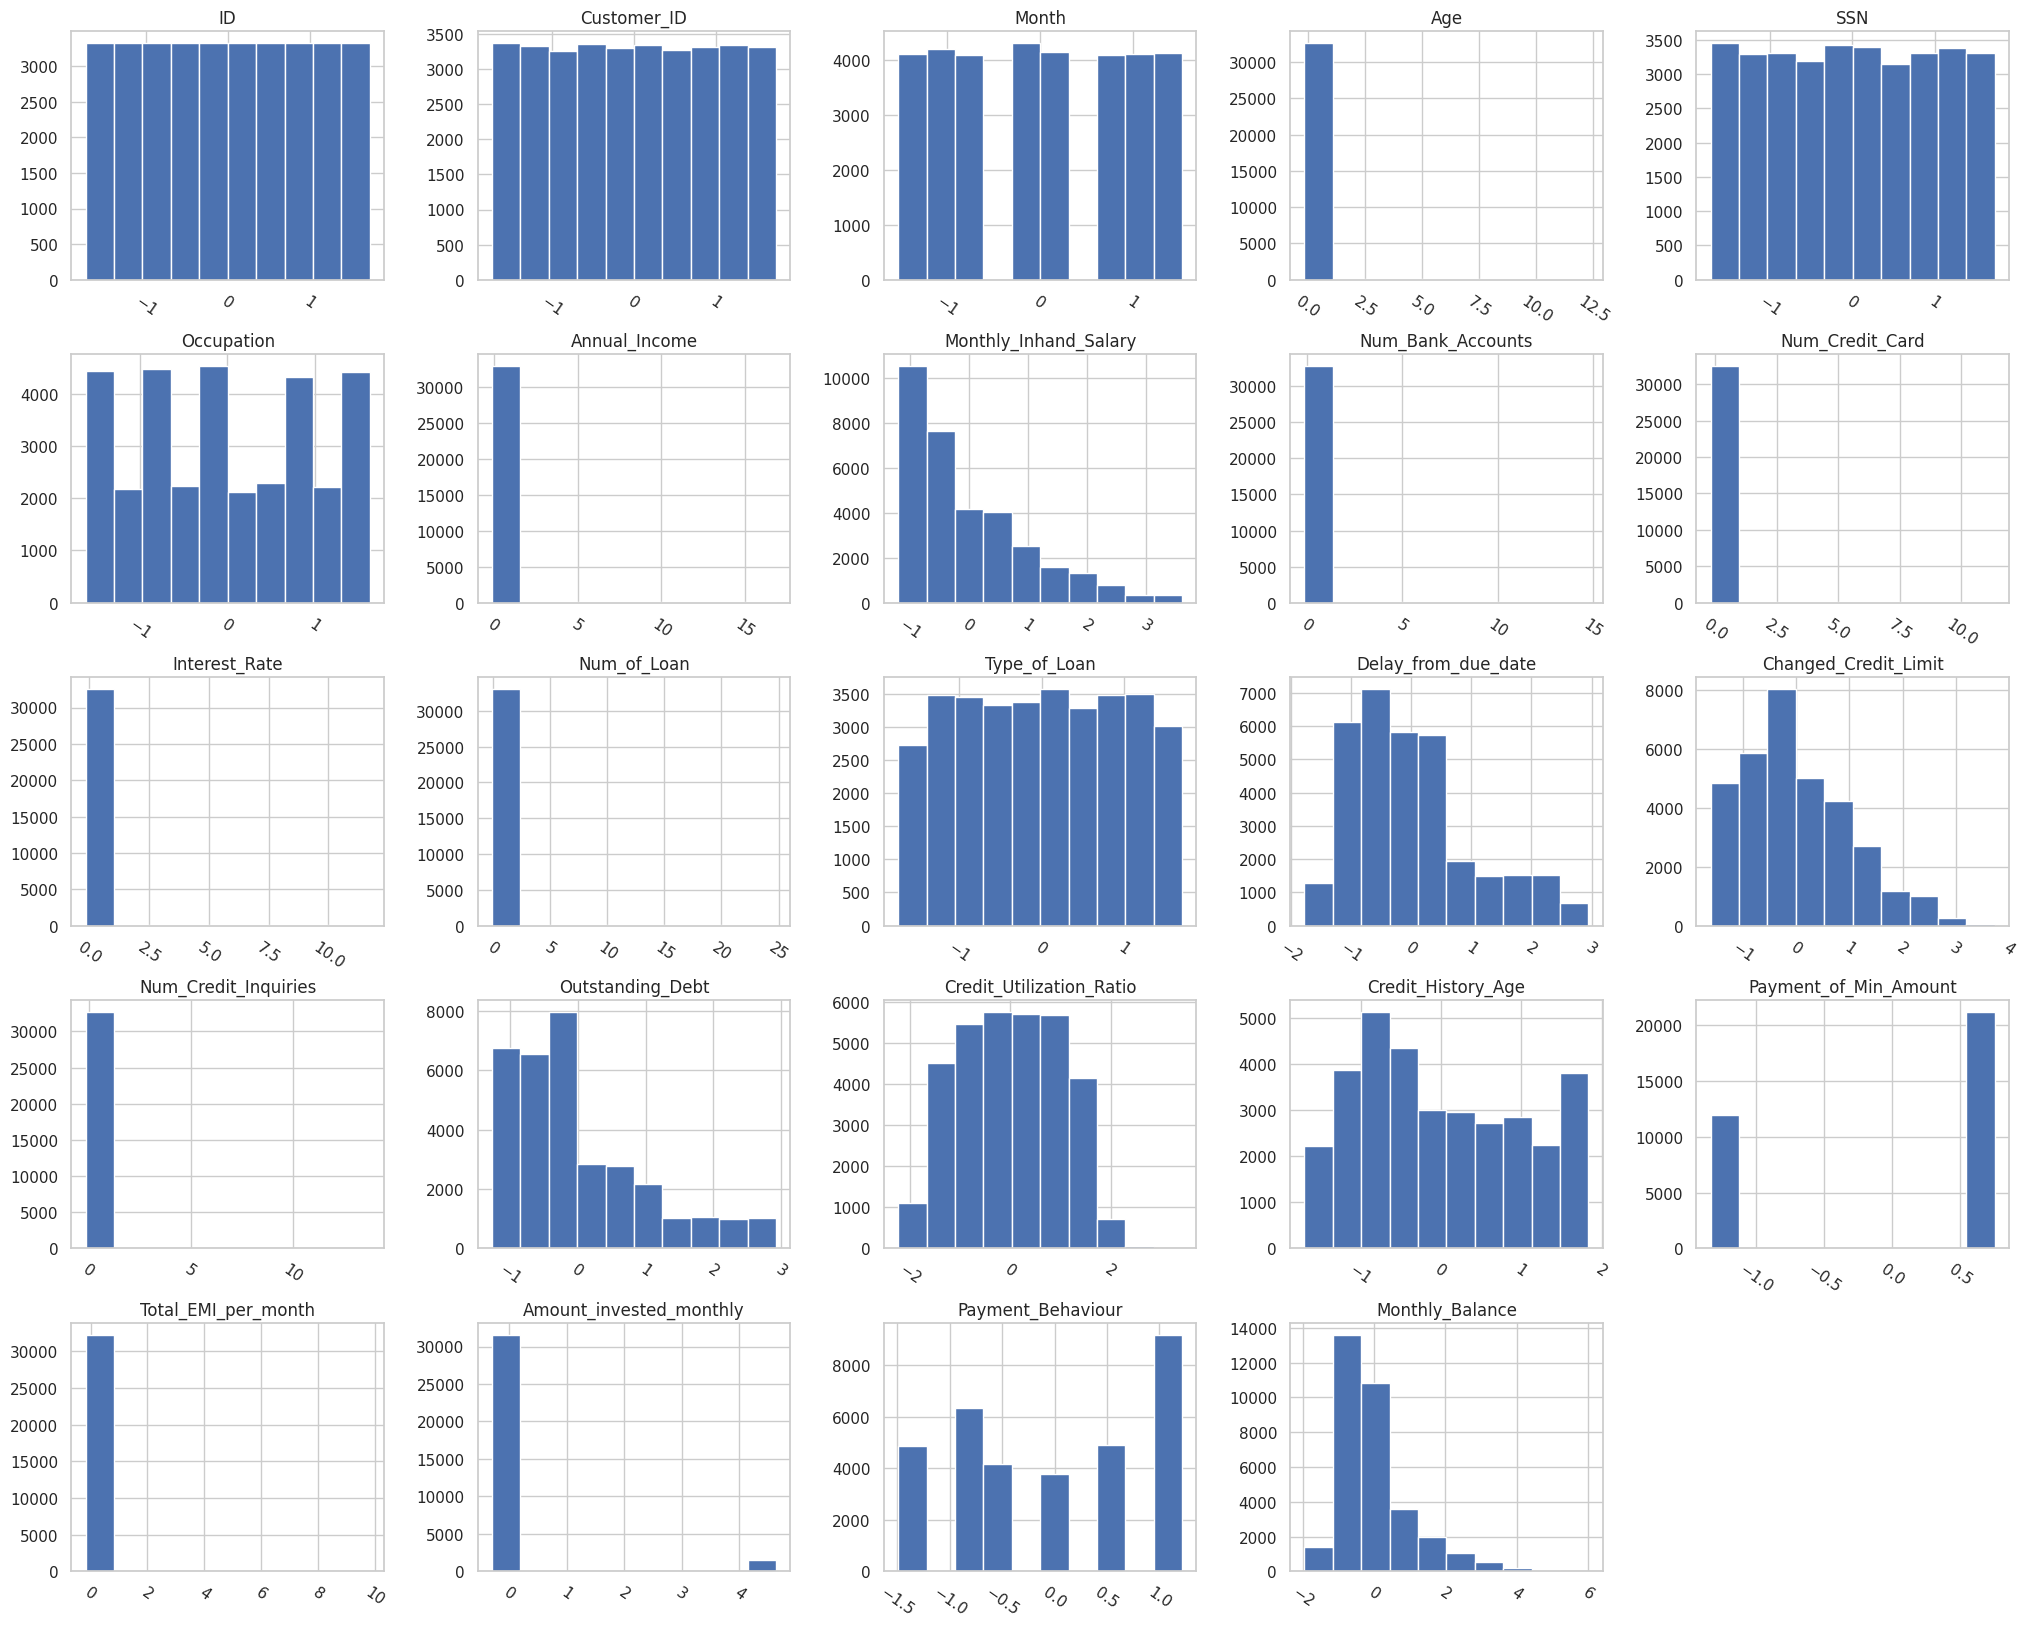

In [47]:
df2.hist(figsize=(25,20), xrot=-35)
plt.show()

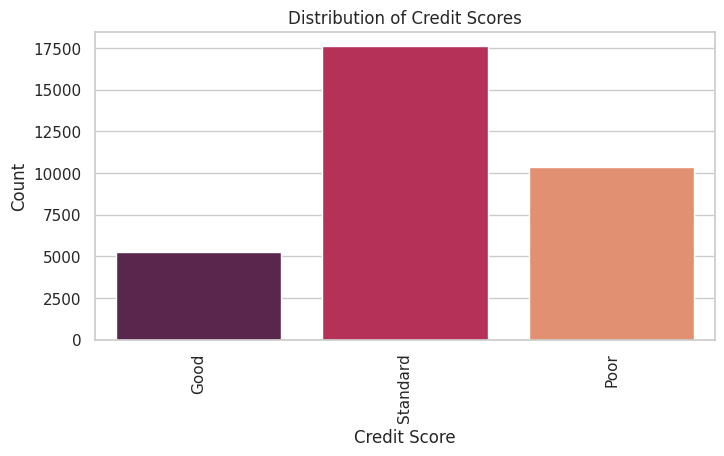

In [48]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df2, x='Credit_Score', palette='rocket')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores')
plt.xticks(rotation=90)
plt.show()

In [49]:
### Change code


# Define the age groups and their corresponding labels
age_bins = [14, 24, 34, 44, 54, 64, 74]
age_labels = ['14-24', '25-34', '35-44', '45-54', '55-64', '65-74']

# Create the "Grouped_Age" column
df2['Grouped_Age'] = pd.cut(df2['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the first few rows to verify the new column
print(df2[['Age', 'Grouped_Age']].head())

         Age Grouped_Age
0  -0.136309         NaN
6  -0.136309         NaN
9  -0.129131         NaN
10 -0.129131         NaN
12 -0.129131         NaN


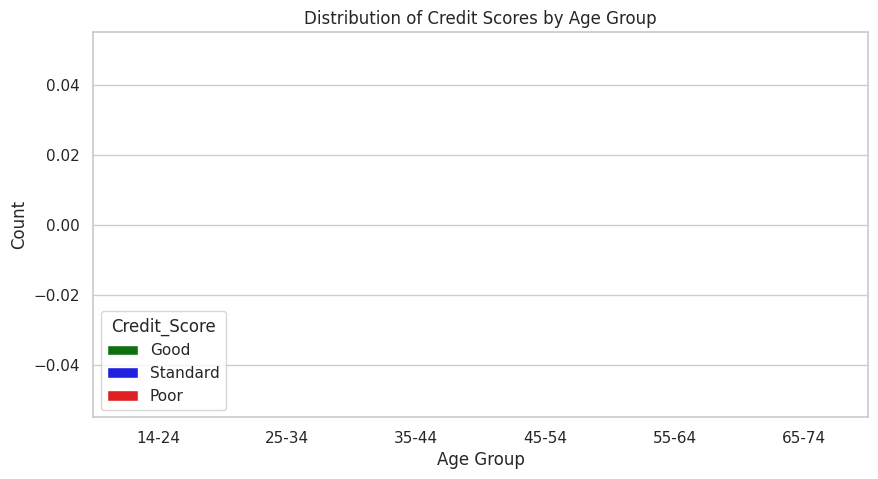

In [50]:

custom_palette = {'Good': 'green', 'Standard': 'blue', 'Poor': 'red'}
plt.figure(figsize=(10, 5))
sns.countplot(data=df2, x='Grouped_Age', hue='Credit_Score', palette=custom_palette)
plt.title('Distribution of Credit Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


In [51]:
data['Occupation'].unique()

array([ 1.1640799 ,  1.39620362, -0.69290986, -0.46078614,  0.0034613 ,
        0.69983246, -0.92503358, -0.22866242,  0.23558502,  0.46770874,
        1.62832734, -1.62140474, -1.38928102,  0.93195618, -1.1571573 ])

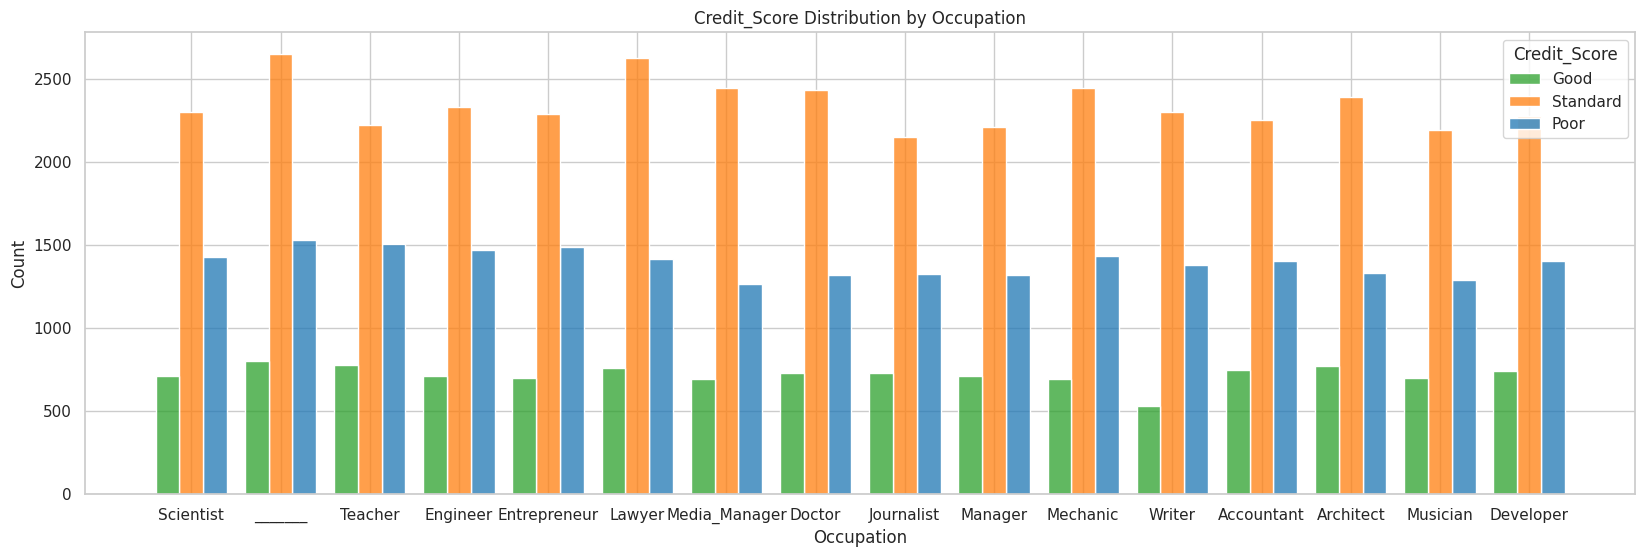

In [52]:


colors = ['#2ca02c', '#ff7f0e', '#1f77b4']
plt.figure(figsize=(20, 6))
sns.histplot(data=df, x="Occupation", hue="Credit_Score", multiple="dodge", shrink=0.8, palette=colors)
plt.title("Credit_Score Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()


##does the monthly inhand salary affect the target

<ipython-input-53-ff4083ba24df>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Monthly_Inhand_Salary'])


<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Density'>

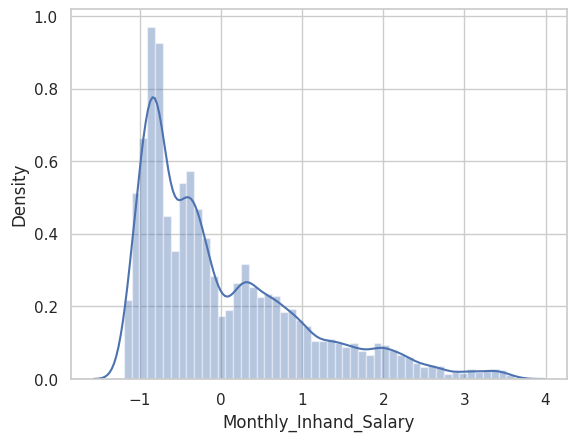

In [53]:
sns.distplot(df2['Monthly_Inhand_Salary'])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

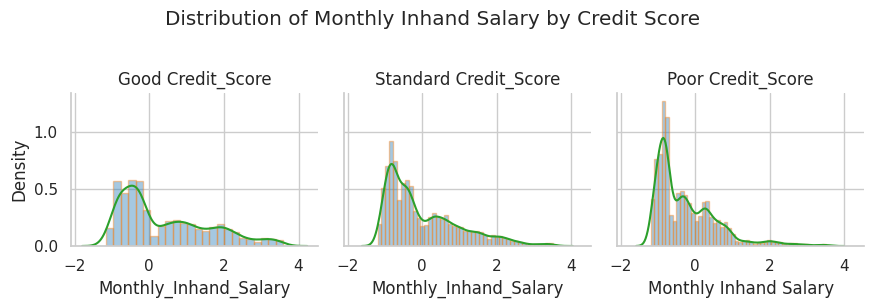

In [54]:

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
grid = sns.FacetGrid(df2, col='Credit_Score')
grid.map(sns.distplot, 'Monthly_Inhand_Salary', color=colors[0], kde_kws={'color': colors[2]}, hist_kws={'edgecolor': colors[1]})
grid.set_titles(col_template="{col_name} Credit_Score")
plt.xlabel("Monthly Inhand Salary")
plt.ylabel("Density")
plt.suptitle("Distribution of Monthly Inhand Salary by Credit Score", y=1.02)
plt.tight_layout()

plt.show()


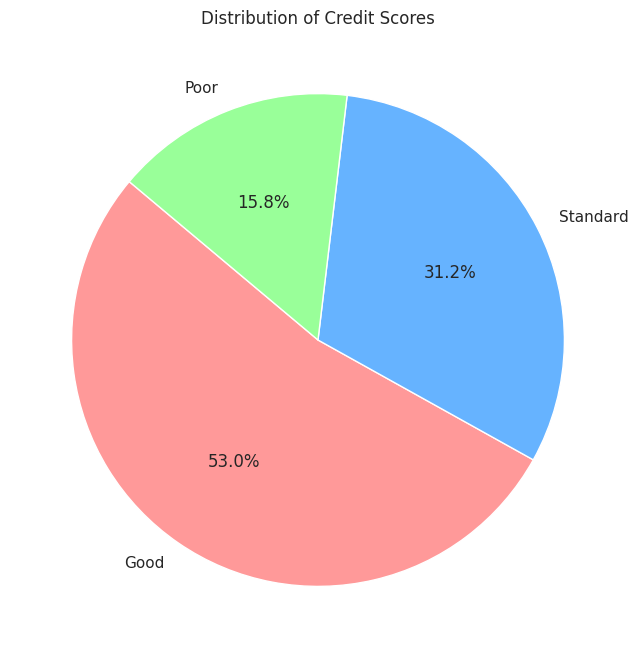

In [55]:

colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.figure(figsize=(8, 8))
plt.pie(df2['Credit_Score'].value_counts(), labels=df2['Credit_Score'].unique(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Credit Scores')
plt.show()


Index(['ID', 'Customer_ID', 'Month', 'SSN', 'Occupation',
       'Monthly_Inhand_Salary'],
      dtype='object')


<ipython-input-65-6e96735c645d>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colum,value in outlier_df.iteritems():


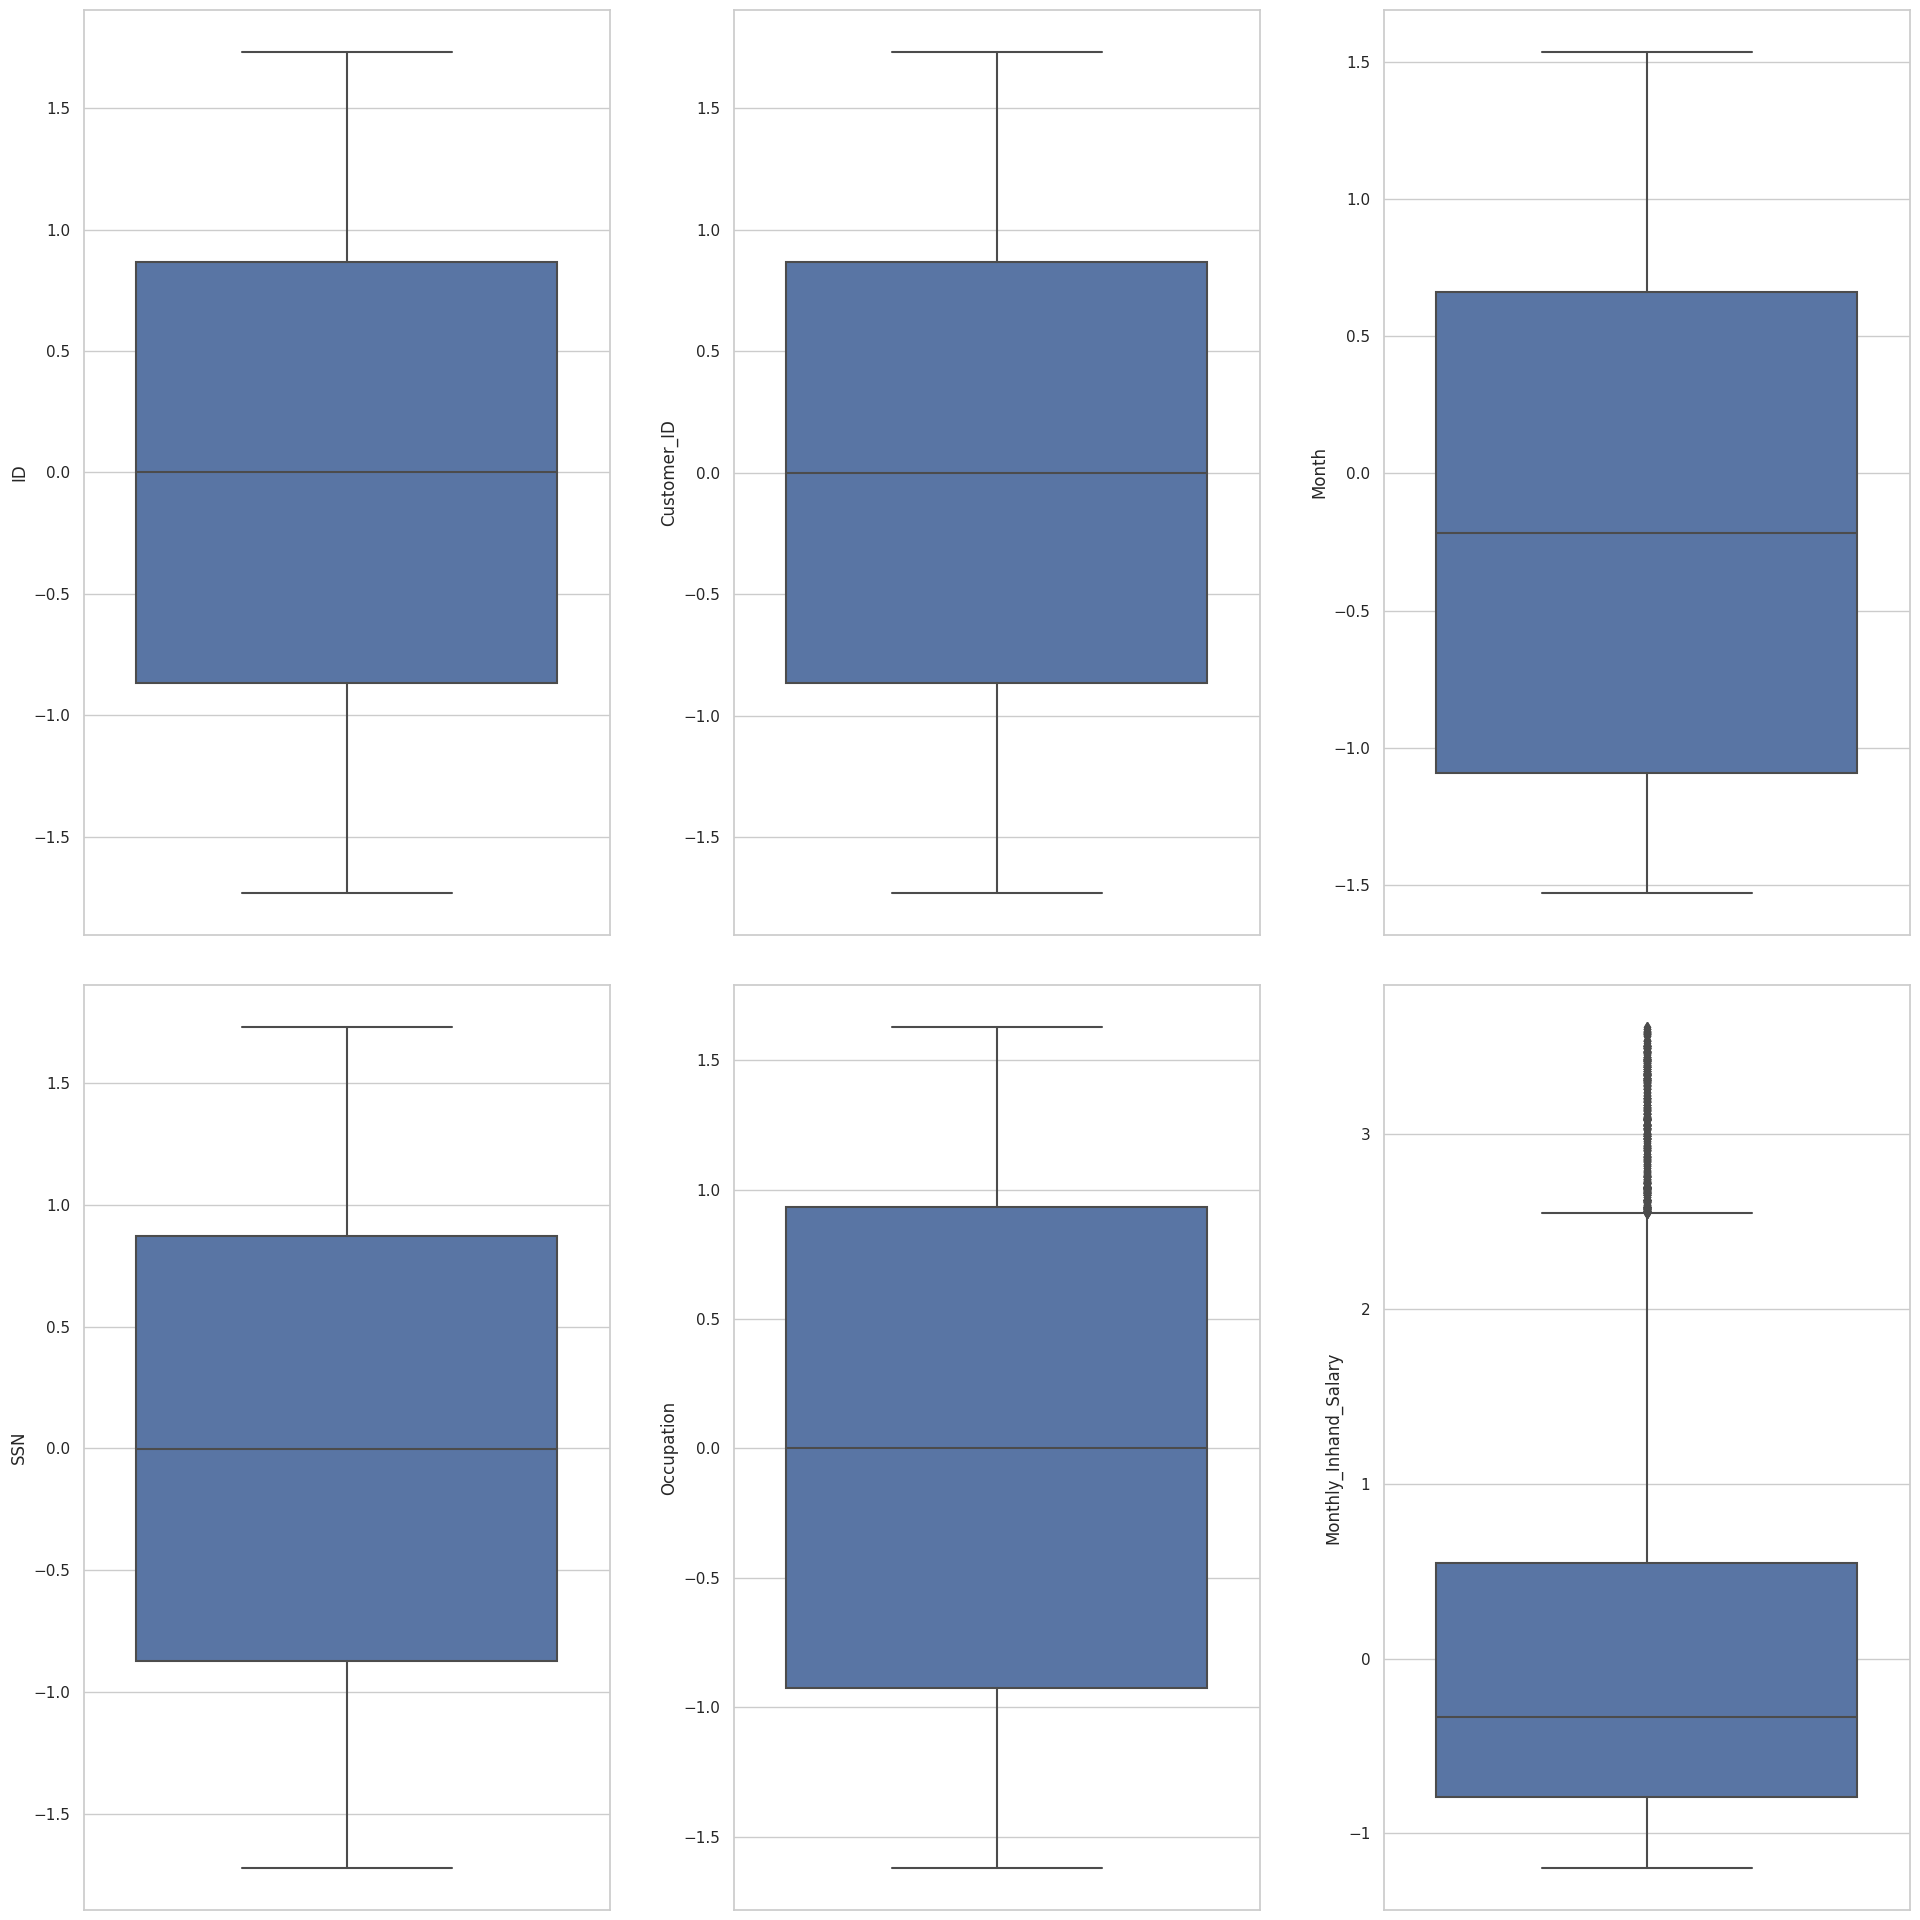

In [65]:
outlier_df = data[["ID","Customer_ID","Month","SSN","Occupation","Monthly_Inhand_Salary"]]
print(outlier_df.columns)
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,20))
index = 0
ax = ax.flatten()
for colum,value in outlier_df.iteritems():
  try:
    sns.boxplot(y=colum, data=outlier_df, ax=ax[index])
    index += 1
  except:
    pass

plt.tight_layout(pad=3, w_pad=3, h_pad=3)

In [66]:
data.loc[data.Monthly_Inhand_Salary > 2.5,'Monthly_Inhand_Salary']=  2.5


Index(['ID', 'Customer_ID', 'Month', 'SSN', 'Occupation',
       'Monthly_Inhand_Salary'],
      dtype='object')


<ipython-input-69-73622c75a83b>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colum,value in df.iteritems():


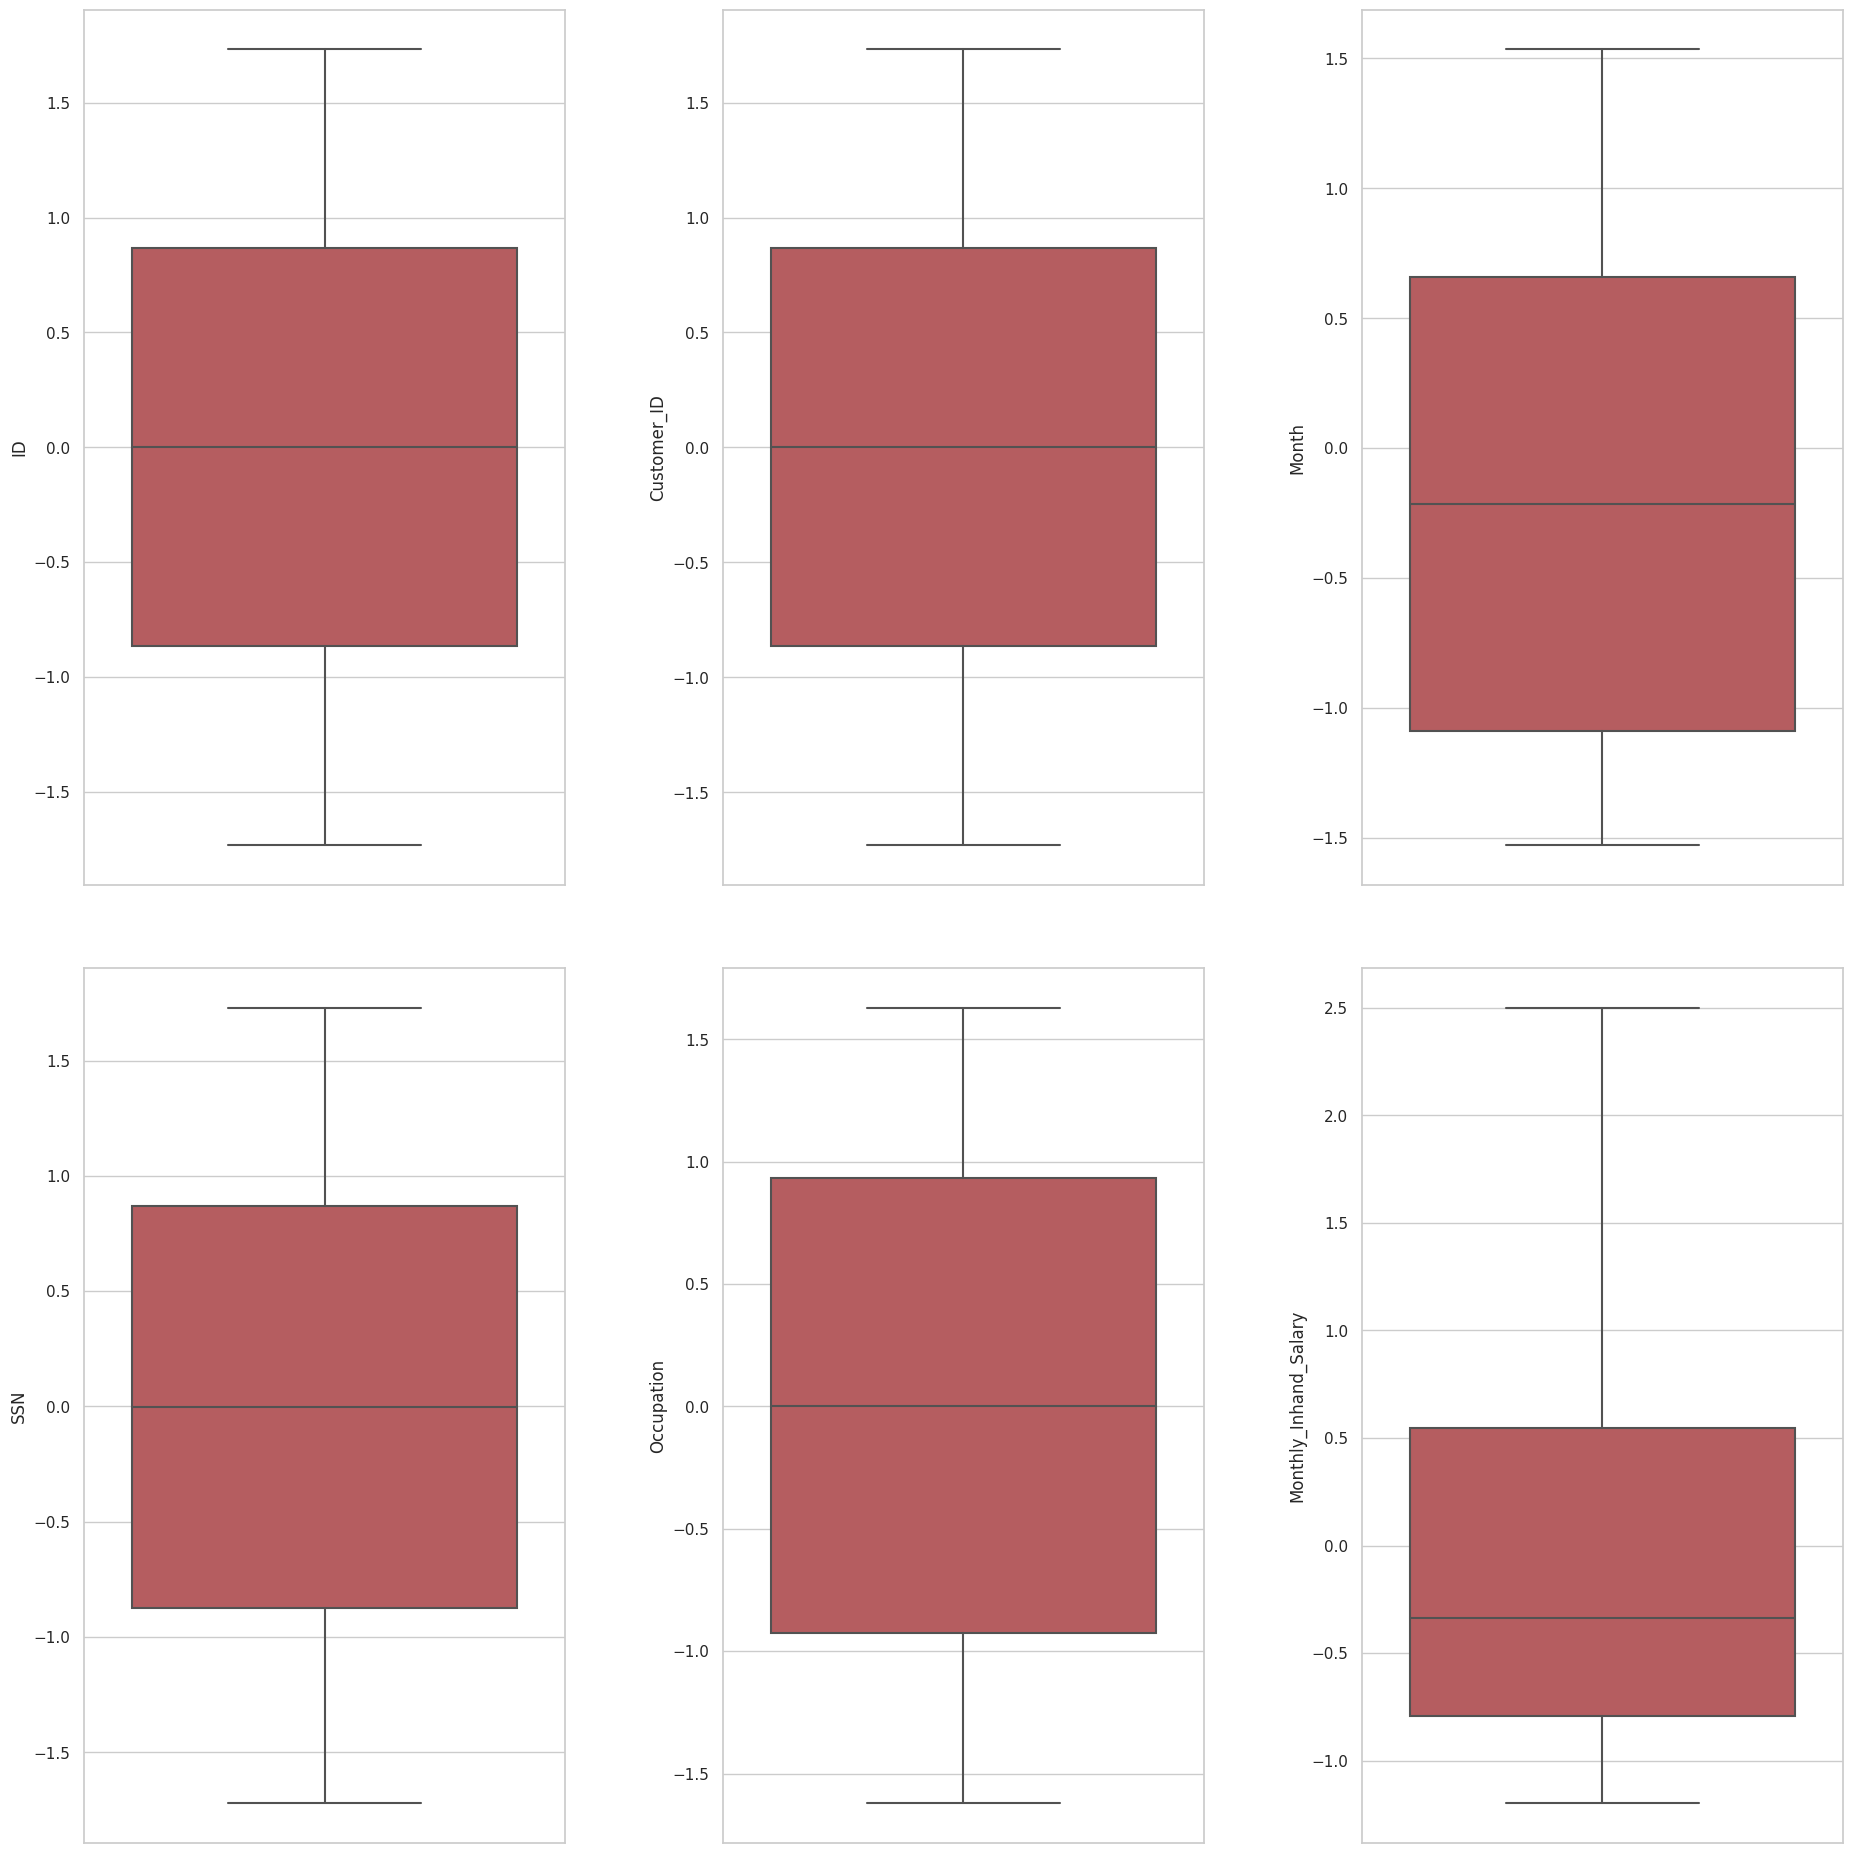

In [69]:
outlier_df = data[["ID","Customer_ID","Month","SSN","Occupation","Monthly_Inhand_Salary"]]
print(outlier_df.columns)



fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,20))
index = 0
ax = ax.flatten()
for colum,value in df.iteritems():
  try:
    sns.boxplot(y=colum, data=outlier_df,color = 'r', ax=ax[index])
    index += 1
  except:
    pass


plt.tight_layout(pad=5, w_pad=5, h_pad=5)

<ipython-input-75-06b1989aadd0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<Axes: >

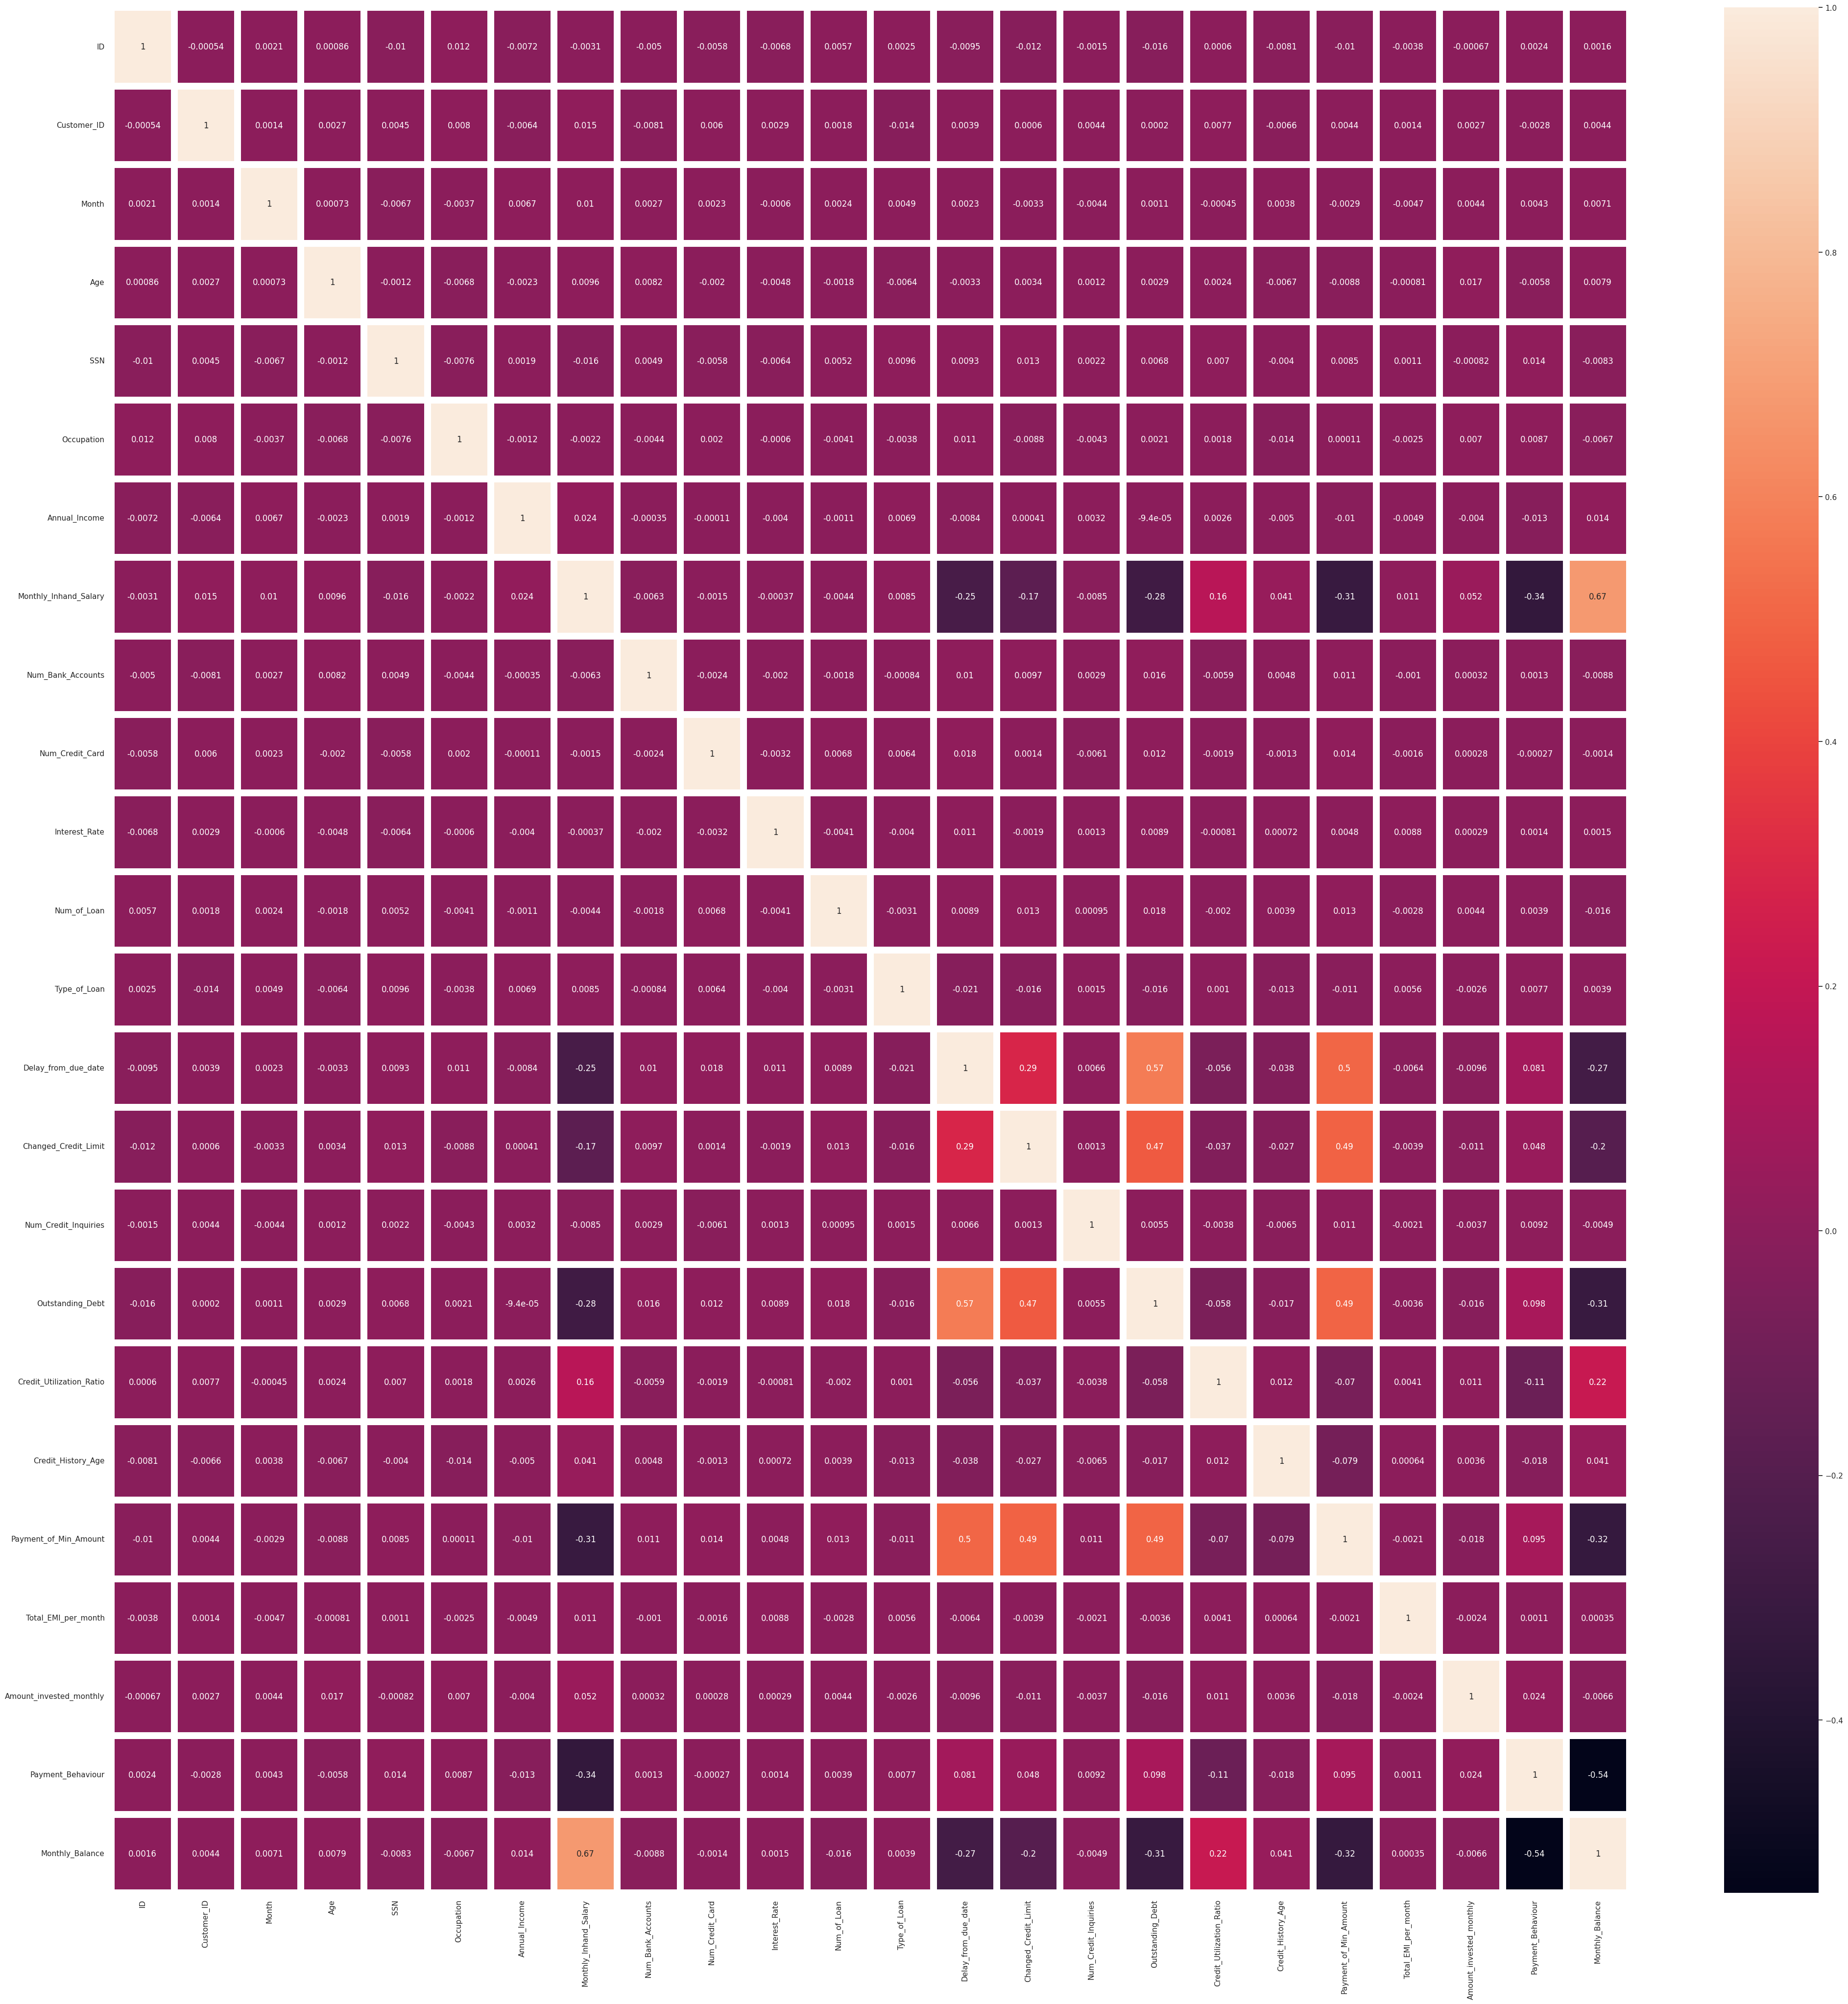

In [75]:
correlation_matrix = data.corr()

fig, ax = plt.subplots(figsize=(50,50))

sns.heatmap(correlation_matrix, annot=True, linewidths=10, ax=ax)

In [77]:
# Feature importance
from sklearn.feature_selection import SelectKBest, f_classif

X = data.drop(["Credit_Score","Name"], axis=1)
y = data["Credit_Score"]
feature_Selection = SelectKBest(score_func=f_classif, k="all")
feature_Selection.fit(X, y)
val1 = sum(feature_Selection.scores_)
val2 = feature_Selection.scores_/val1
total = val2 *100
result_dict = {}
for i, j in enumerate(X.columns):
  result_dict[j] = total[i]

print(result_dict)

{'ID': 0.0012147367563961565, 'Customer_ID': 0.023108934275206414, 'Month': 0.008984585022232532, 'Age': 0.0015644012048182958, 'SSN': 0.016400377893304046, 'Occupation': 0.02348165202443076, 'Annual_Income': 0.014315782111859427, 'Monthly_Inhand_Salary': 5.5472390581782385, 'Num_Bank_Accounts': 0.024931236139676974, 'Num_Credit_Card': 0.015590474945945221, 'Interest_Rate': 0.003825997206008681, 'Num_of_Loan': 0.0023974384416994014, 'Type_of_Loan': 0.000845722763895247, 'Delay_from_due_date': 25.832553110607243, 'Changed_Credit_Limit': 5.749135214592211, 'Num_Credit_Inquiries': 0.02395553012084498, 'Outstanding_Debt': 19.86933100875374, 'Credit_Utilization_Ratio': 0.17970456031871984, 'Credit_History_Age': 0.4970163373065513, 'Payment_of_Min_Amount': 35.49462932086554, 'Total_EMI_per_month': 0.003187968966796105, 'Amount_invested_monthly': 0.0017431672081546252, 'Payment_Behaviour': 1.8236366918060976, 'Monthly_Balance': 4.841206692490389}


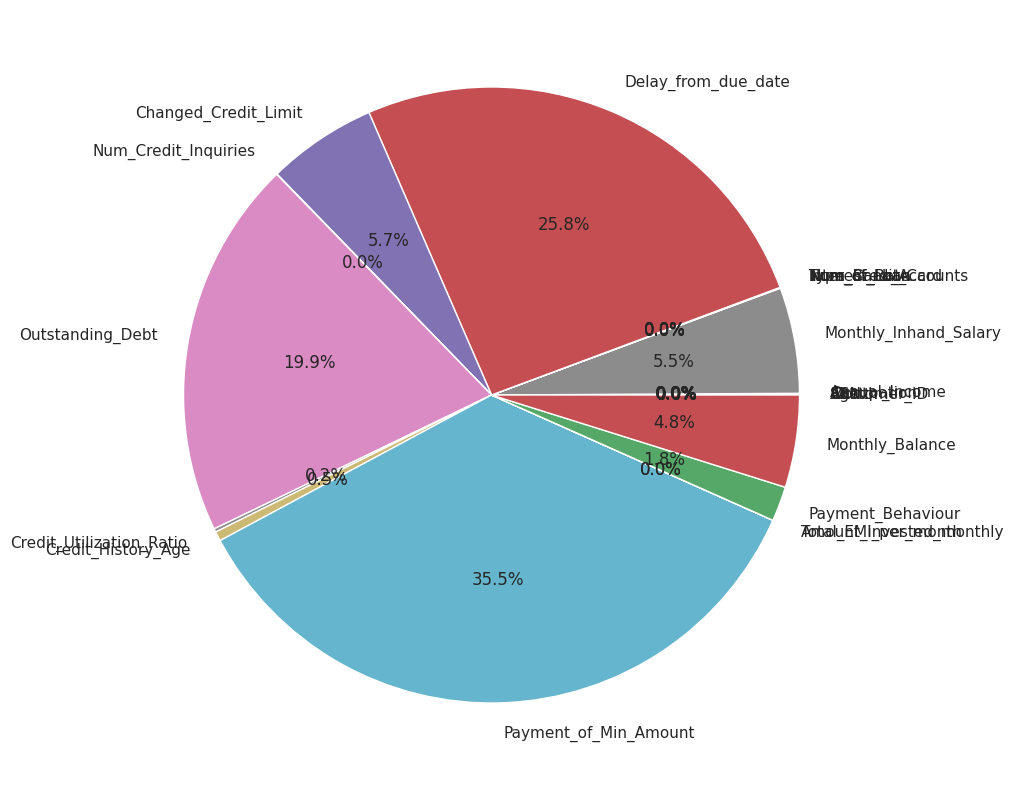

In [81]:
plt.figure(figsize = (10, 10))
# plt.pie([float(your_data[v]) for v in result_dict], labels=[str(k) for k in result_dict], autopct='%1.1f%%')
plt.pie(result_dict.values(), labels=result_dict.keys(),autopct='%1.1f%%')
plt.show()